# Linear Regression Exercises

In [100]:
# Import pandas as pd, numpy as np, seaborn as sns, sklearns train_test_split, LinearRegression, mean_absolute_errors and mean_squared_error 
# Import the 'fetch_california_housing' dataset


import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Type your code above this line


In [66]:
# Load 'fetch_california_housing' into data

data = fetch_california_housing()
data


# Type your code above this line

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [68]:
# Create a DataFrame from the data

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()




# Type your code above this line

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [69]:
# Add the data target to the existing dataframe to a new column called 'Target'


df['Target'] = data.target
df.head()


# Type your code above this line

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


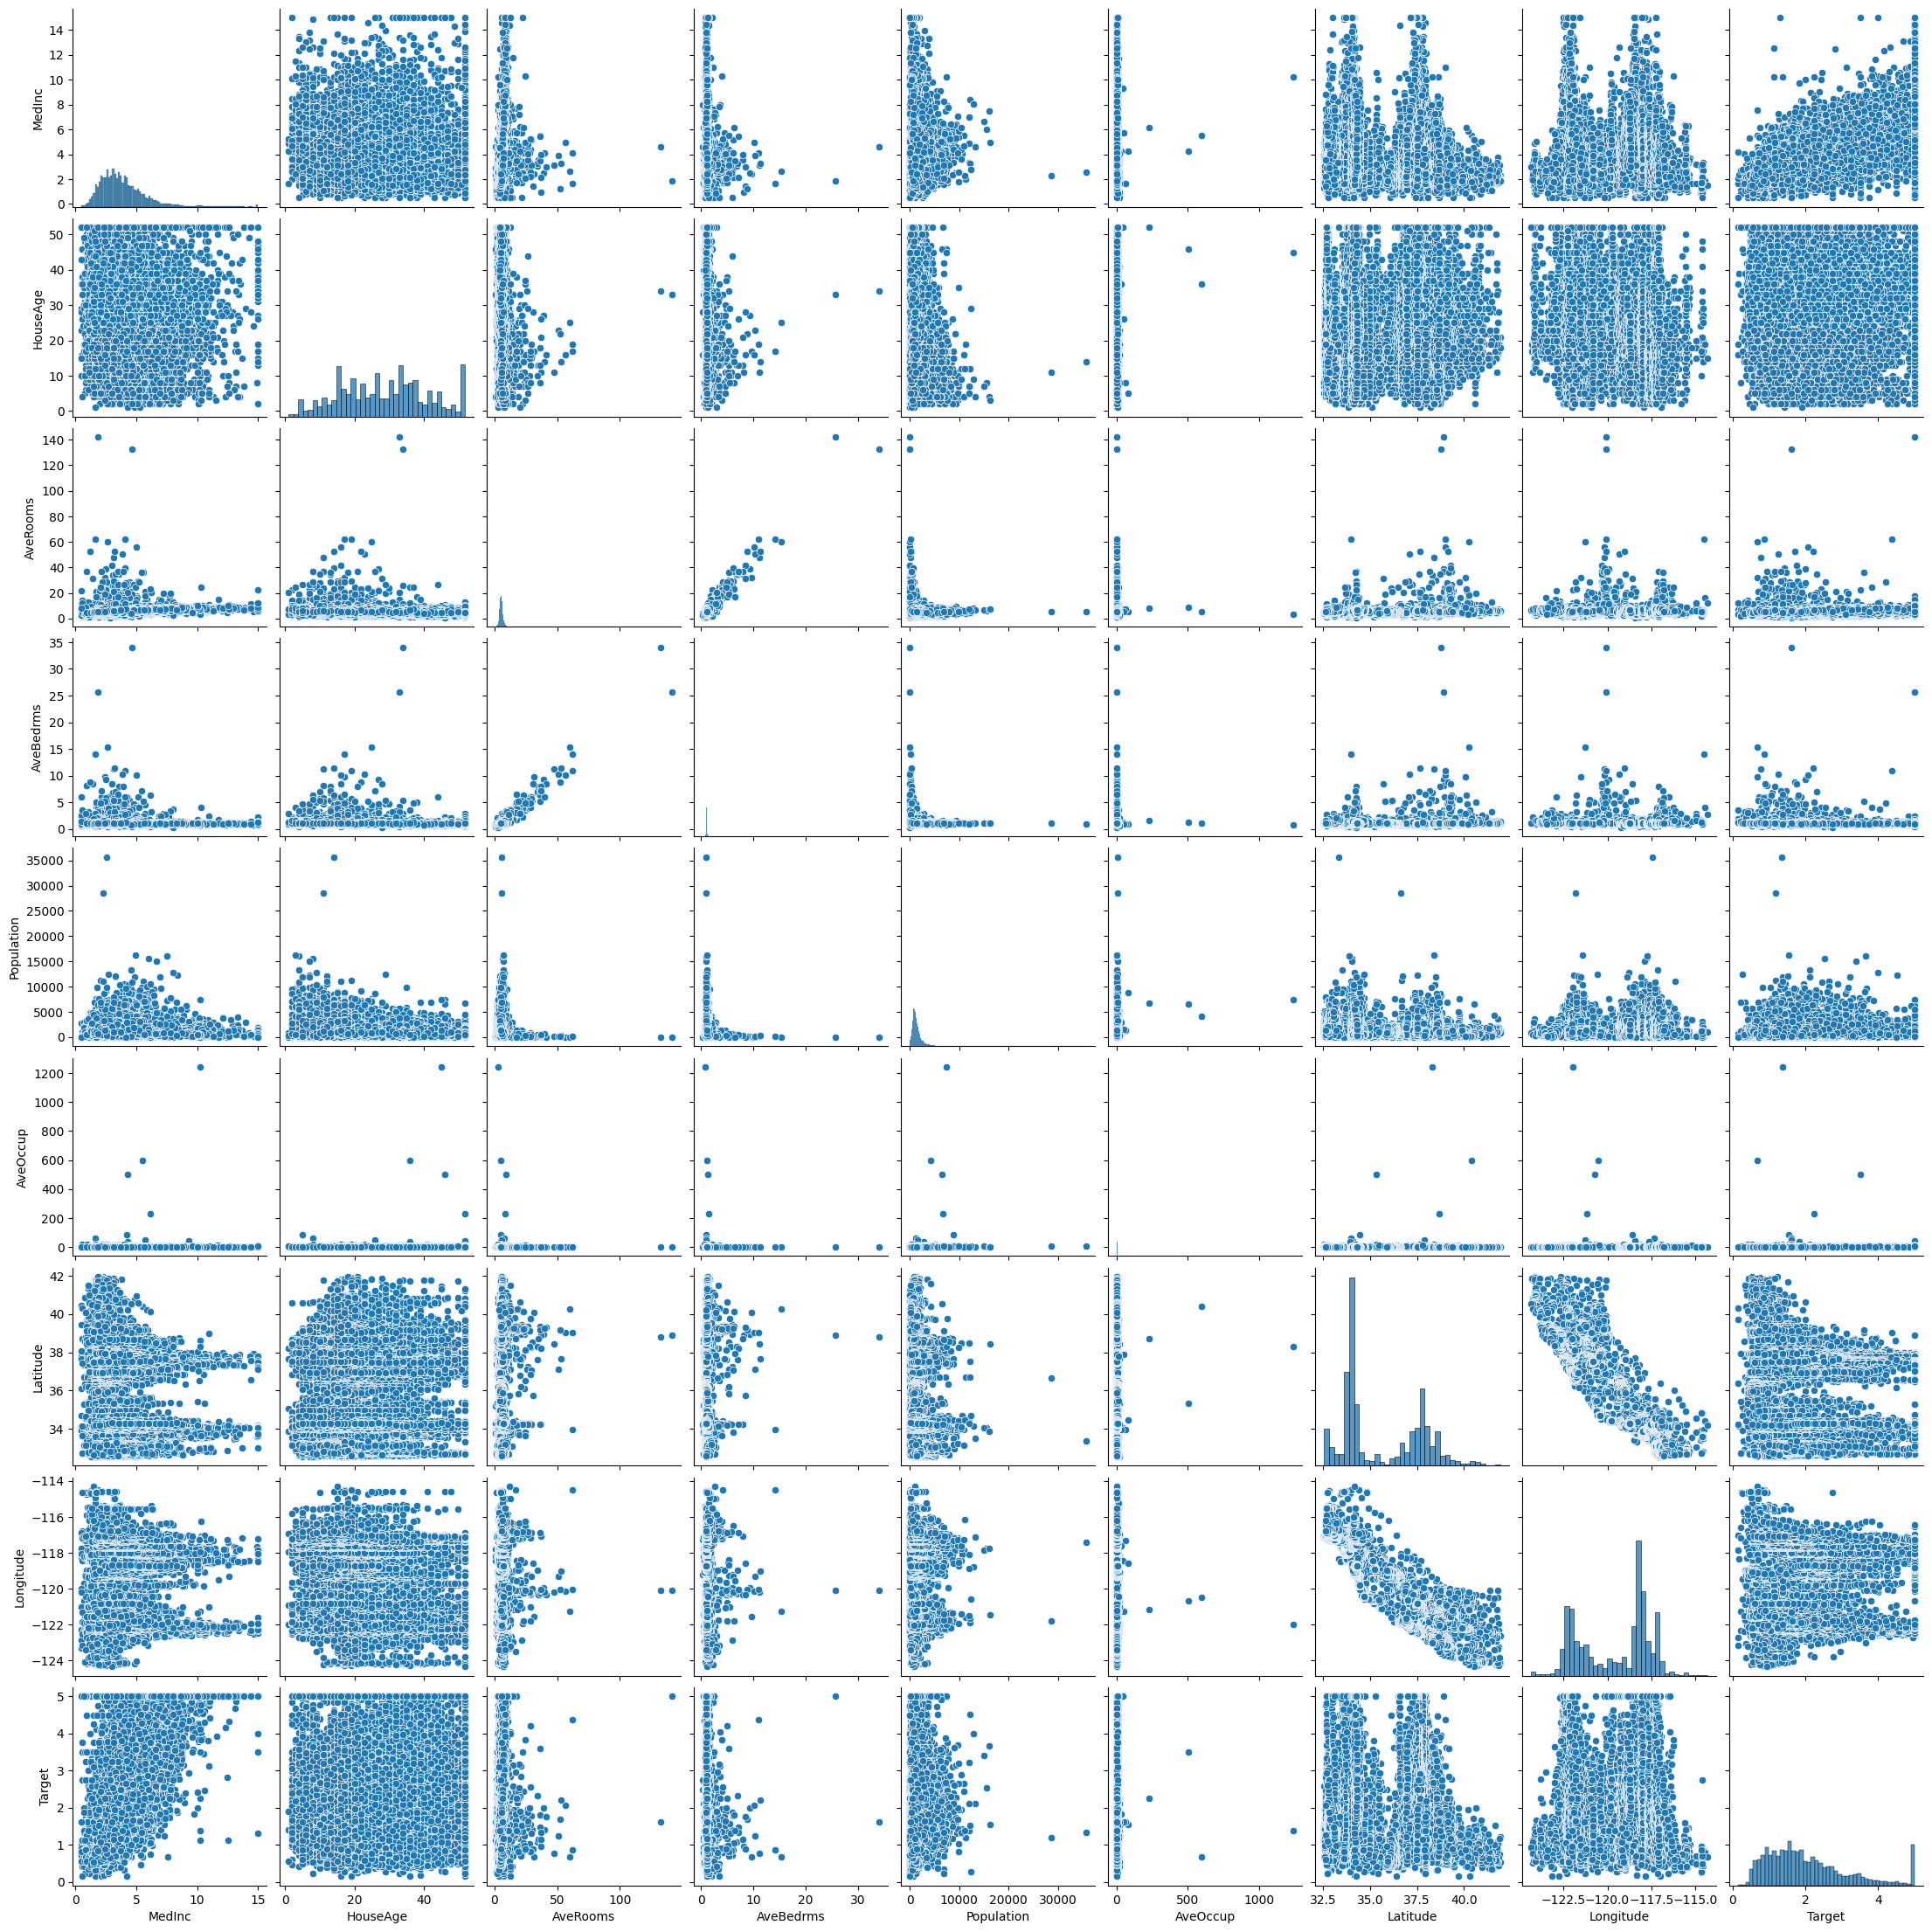

In [70]:
# Create a pairplot and look for any columsn that may have correlation

sns.pairplot(df)


# Type your code above this line

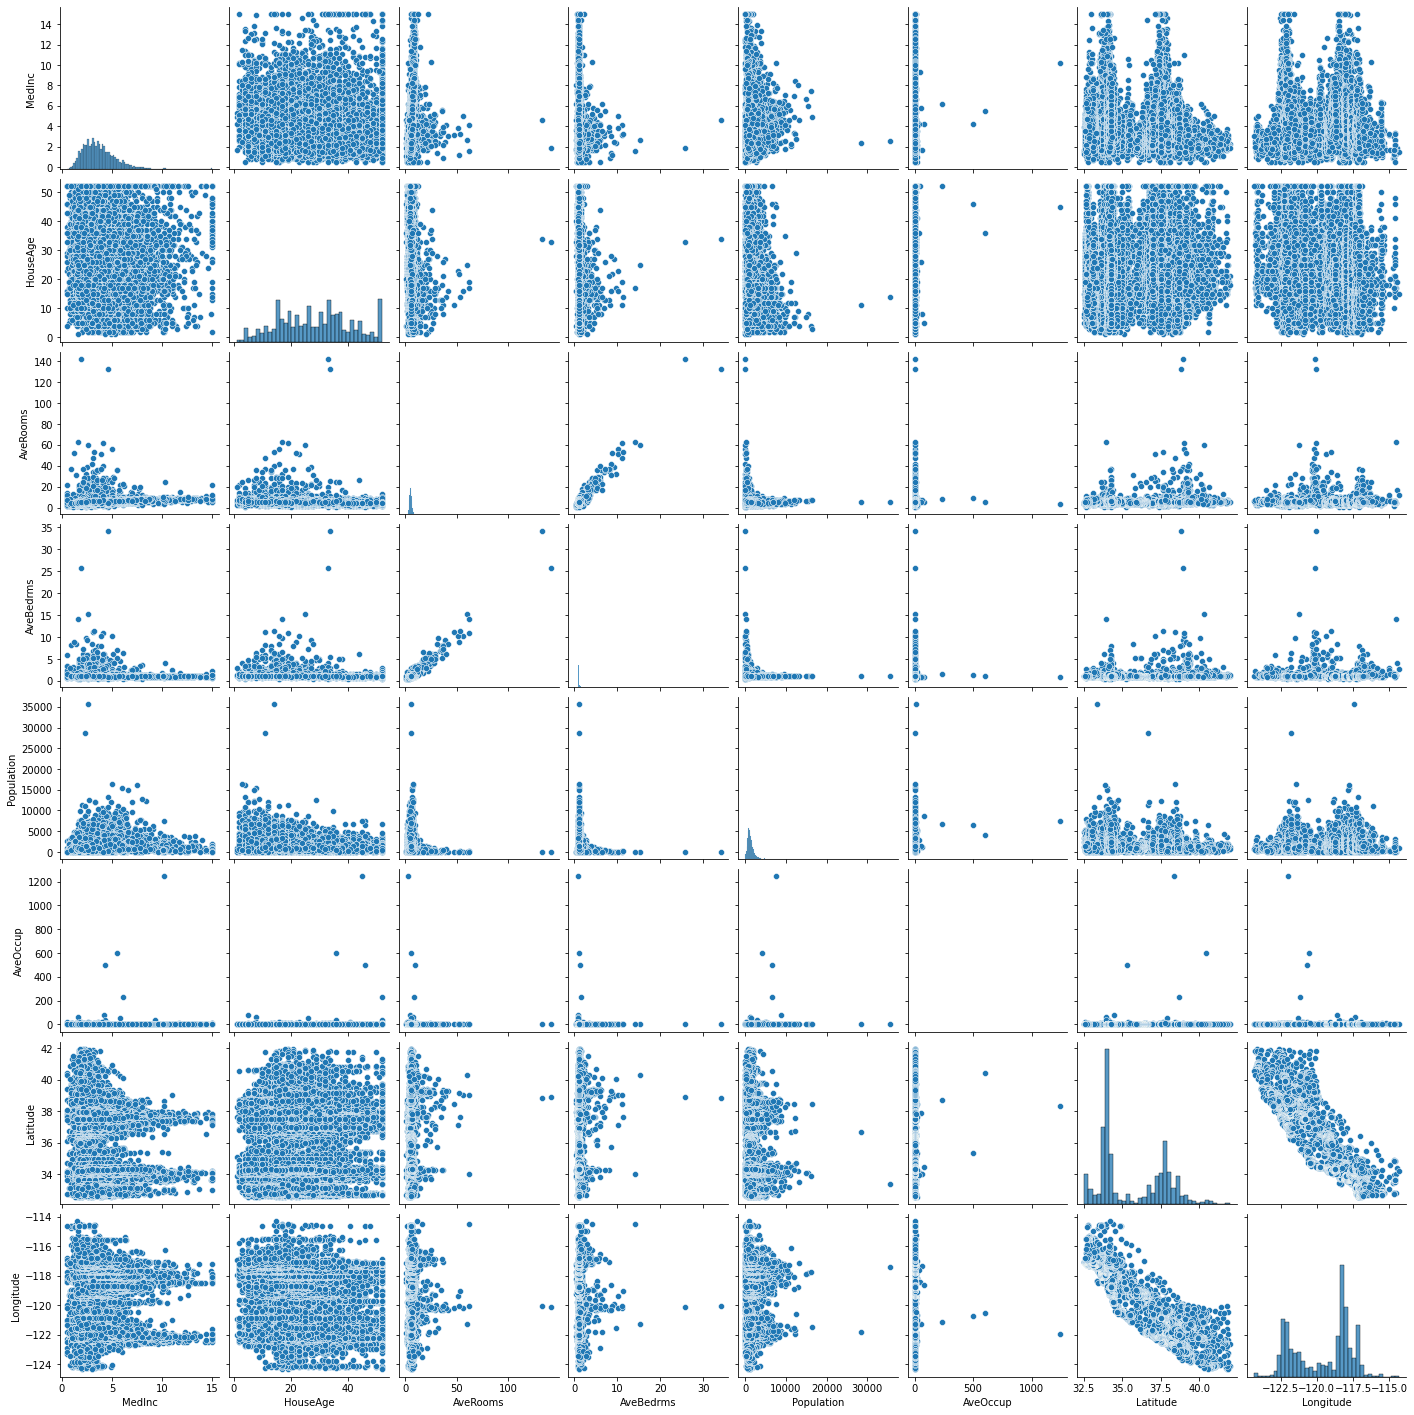

In [72]:
# Create a dataframe with all the columns other than that 'Target' data column called 'X'

# df.columns
# X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
#        'Latitude', 'Longitude']]

X = df[df.columns[:-1]]
X.head()


# Type your code above this line

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [73]:
# Create a dataframe with the 'Target' column from the dataframe called 'y'

y = df['Target']
y.head()



# Type your code above this line

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [75]:
# train_test_split the X and y data and the test_size should be 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Type your code above this line

In [76]:
# Instantiate the Linear Regression model into 'lr'

lr = LinearRegression()


# Type your code above this line

In [77]:
# Fit the model with X_train, y_train

lr.fit(X_train, y_train)


# Type your code above this line

LinearRegression()

In [81]:
# Run the model prediction on the X_test dataset


pred_lr = lr.predict(X_test)
len(pred_lr)
y_test.info()

# Type your code above this line

<class 'pandas.core.series.Series'>
Int64Index: 6192 entries, 20046 to 5786
Series name: Target
Non-Null Count  Dtype  
--------------  -----  
6192 non-null   float64
dtypes: float64(1)
memory usage: 96.8 KB


array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [82]:
# Take a look at the model score, do you think it's a good score?
# If you used a different random_state in train_test_split() then your results might differ

lr.score(X_test, y_test)


# Type your code above this line

0.595770232606166

0.595770232606166

In [90]:
# Create a ceofs dataframe and explore it
# If you used a different random_state in train_test_split() then your results might differ

lr.coef_

coefs = pd.DataFrame(lr.coef_, index=X.columns)
print(coefs)

print(y.head())
X.head()

# Type your code above this line

                       0
MedInc      4.458226e-01
HouseAge    9.681868e-03
AveRooms   -1.220951e-01
AveBedrms   7.785996e-01
Population -7.757404e-07
AveOccup   -3.370027e-03
Latitude   -4.185367e-01
Longitude  -4.336880e-01
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,0
MedInc,4.458226e-01
HouseAge,9.681868e-03
AveRooms,-1.220951e-01
AveBedrms,7.785996e-01
Population,-7.757404e-07
AveOccup,-3.370027e-03
Latitude,-4.185367e-01
Longitude,-4.336880e-01


20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Length: 6192, dtype: float64

<AxesSubplot:xlabel='Target'>

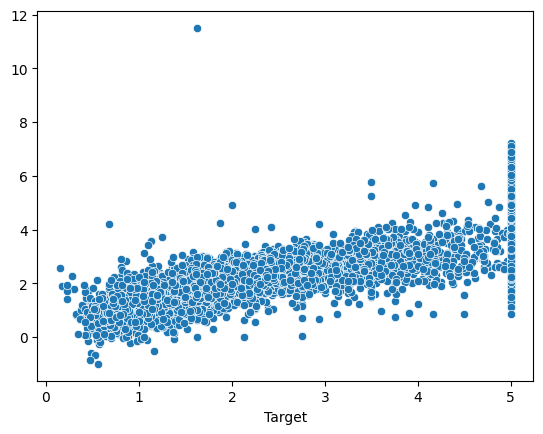

In [91]:
# Create a scatter plot using sns between the y_test and the predictions
# Is there a correlation?
# If you used a different random_state in train_test_split() then your results might differ

sns.scatterplot(x=y_test, y=pred_lr)

# Type your code above this line

<AxesSubplot:>

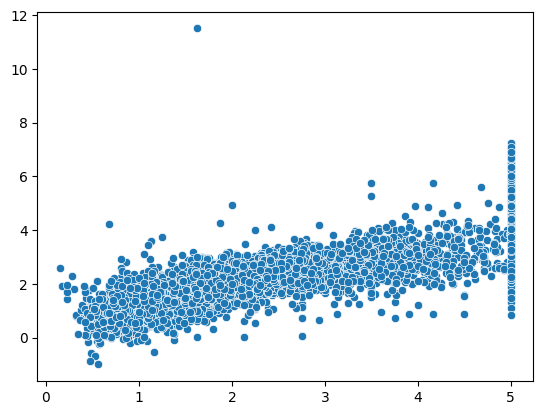

<AxesSubplot:xlabel='Target', ylabel='Count'>

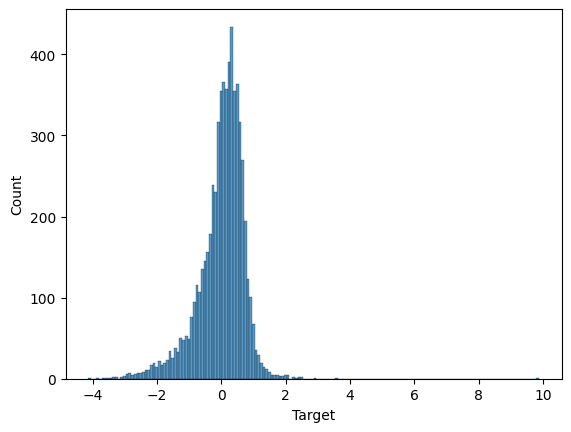

In [93]:
# Create a hist plot using sns between the y_test and the predictions
# Is there a correlation?
# If you used a different random_state in train_test_split() then your results might differ

sns.histplot(pred_lr-y_test)




# Type your code above this line

<AxesSubplot:ylabel='Count'>

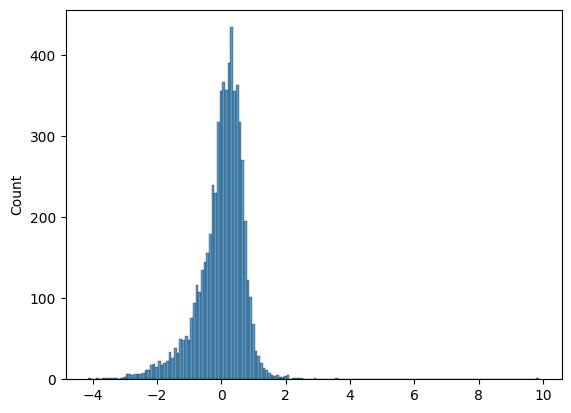

In [102]:
# What is the mean_absolute_error, mean_square_error and root_mean_square_error
# If you used a different random_state in train_test_split() then your results might differ


print('MAE:', mean_absolute_error(y_test, pred_lr) )
print('MSE:', mean_squared_error(y_test, pred_lr) )
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_lr)) )
print('R2 Score:', r2_score(y_test, pred_lr))
print('Model Score',lr.score(X_test, y_test))


# Type your code above this line

MAE: 0.5272474538305936
MSE: 0.5305677824766758
RMSE: 0.7284008391515456
R2 Score: 0.595770232606166
Model Score 0.595770232606166


Mean Absolute Error 0.5272474538305936
Mean Squared Error 0.5305677824766758
Root Mean Squared Error 0.7284008391515456


<AxesSubplot:xlabel='Target'>

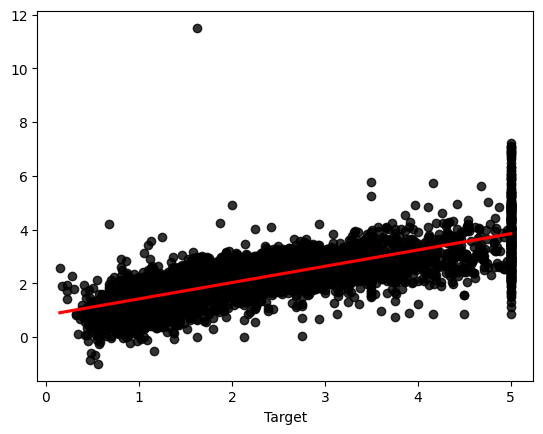

In [99]:
# Create a RegPlot comparing y_test and predictions
# If you used a different random_state in train_test_split() then your results might differ


sns.regplot(x=y_test, y=pred_lr, scatter_kws={"color": "black"}, line_kws={"color": "red"})


# Type your code above this line

<AxesSubplot:>

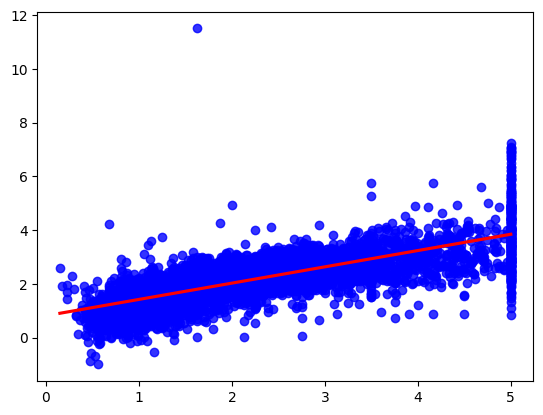